In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud




[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/spam.csv', encoding='latin-1')

# Print the head of the DataFrame to verify if it was read correctly
print(df.head())

     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  


In [ ]:
print(df.columns)

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')


In [ ]:
# If there are unnecessary columns, drop them
df = df[['v1', 'v2']]
df.columns = ['label', 'message']


In [ ]:
print(df.head())

  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [ ]:
df['word_count'] = df['message'].apply(lambda x: len(x.split()))

In [ ]:
print(df['word_count'].describe())


count    5572.000000
mean       15.494436
std        11.329427
min         1.000000
25%         7.000000
50%        12.000000
75%        23.000000
max       171.000000
Name: word_count, dtype: float64


In [ ]:
print(df['label'].value_counts())

label
ham     4825
spam     747
Name: count, dtype: int64


<ipython-input-141-b617dde94e87>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=df, palette='Set2')


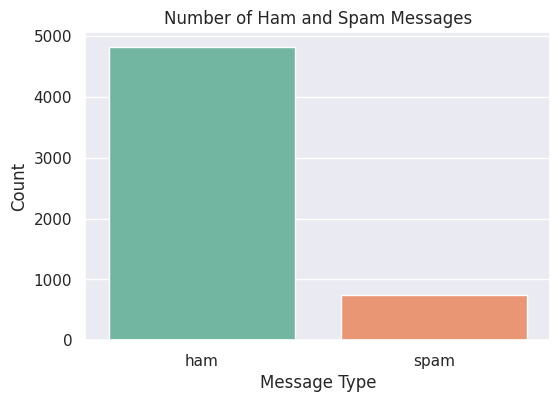

In [ ]:
# Set plot style
sns.set(style='darkgrid')

# Countplot for label distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='label', data=df, palette='Set2')
plt.title('Number of Ham and Spam Messages')
plt.xlabel('Message Type')
plt.ylabel('Count')
plt.show()


In [ ]:
# Initialize stemmer and stopword list
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Tokenize and remove stopwords + apply stemming
    words = text.split()
    words = [stemmer.stem(word) for word in words if word not in stop_words]

    return ' '.join(words)


In [ ]:
df['clean_message'] = df['message'].apply(preprocess_text)

# Preview the cleaned messages
print(df[['message', 'clean_message']].head())


                                             message  \
0  Go until jurong point, crazy.. Available only ...   
1                      Ok lar... Joking wif u oni...   
2  Free entry in 2 a wkly comp to win FA Cup fina...   
3  U dun say so early hor... U c already then say...   
4  Nah I don't think he goes to usf, he lives aro...   

                                       clean_message  
0  go jurong point crazi avail bugi n great world...  
1                              ok lar joke wif u oni  
2  free entri 2 wkli comp win fa cup final tkt 21...  
3                u dun say earli hor u c alreadi say  
4          nah dont think goe usf live around though  


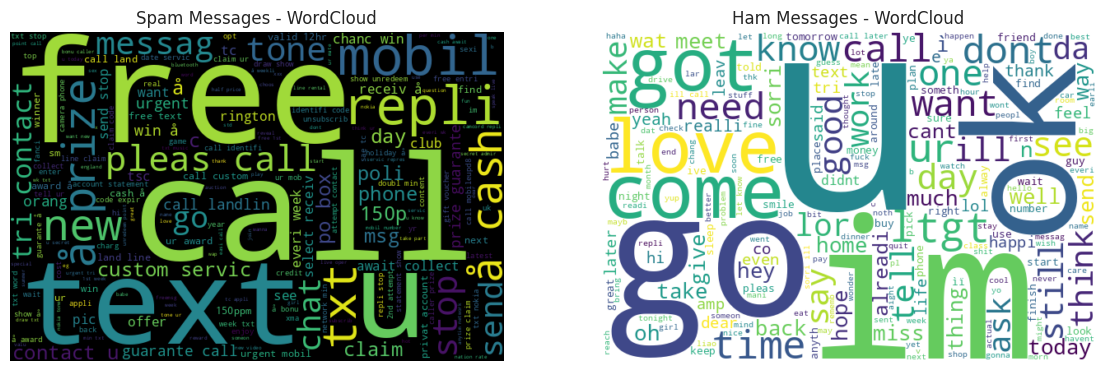

In [ ]:
# Join all messages by label
spam_words = ' '.join(df[df['label'] == 'spam']['clean_message'])
ham_words = ' '.join(df[df['label'] == 'ham']['clean_message'])

# Generate wordclouds
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
spam_cloud = WordCloud(width=600, height=400, background_color='black').generate(spam_words)
plt.imshow(spam_cloud, interpolation='bilinear')
plt.title("Spam Messages - WordCloud")
plt.axis('off')

plt.subplot(1, 2, 2)
ham_cloud = WordCloud(width=600, height=400, background_color='white').generate(ham_words)
plt.imshow(ham_cloud, interpolation='bilinear')
plt.title("Ham Messages - WordCloud")
plt.axis('off')

plt.show()


In [ ]:
# Initialize vectorizer
cv = CountVectorizer()

# Transform clean text into vectors
X = cv.fit_transform(df['clean_message'])

# Target variable
y = df['label'].map({'ham': 0, 'spam': 1})


**Train-Test Split**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Train Model

In [ ]:
# Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Support Vector Machine
svm_model = LinearSVC()
svm_model.fit(X_train, y_train)

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

**make predection**

In [ ]:
nb_preds = nb_model.predict(X_test)
svm_preds = svm_model.predict(X_test)
rf_preds = rf_model.predict(X_test)


**Evaluate Models**

In [ ]:
def evaluate(model_name, y_test, y_pred):
    print(f"\n Evaluation for {model_name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))

evaluate("Naive Bayes", y_test, nb_preds)
evaluate("SVM", y_test, svm_preds)
evaluate("Random Forest", y_test, rf_preds)


 Evaluation for Naive Bayes
Accuracy: 0.9775784753363229
Confusion Matrix:
 [[952  13]
 [ 12 138]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       965
           1       0.91      0.92      0.92       150

    accuracy                           0.98      1115
   macro avg       0.95      0.95      0.95      1115
weighted avg       0.98      0.98      0.98      1115


 Evaluation for SVM
Accuracy: 0.979372197309417
Confusion Matrix:
 [[964   1]
 [ 22 128]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       0.99      0.85      0.92       150

    accuracy                           0.98      1115
   macro avg       0.98      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115


 Evaluation for Random Forest
Accuracy: 0.9757847533632287
Confusion Matrix:
 [[965   0]
 [ 27 123]]
Class

Check Precision, Recall, F1-Score

In [ ]:
print("NB Report:\n", classification_report(y_test, nb_preds))
print("SVM Report:\n", classification_report(y_test, svm_preds))
print("RF Report:\n", classification_report(y_test, rf_preds))


NB Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       965
           1       0.91      0.92      0.92       150

    accuracy                           0.98      1115
   macro avg       0.95      0.95      0.95      1115
weighted avg       0.98      0.98      0.98      1115

SVM Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       0.99      0.85      0.92       150

    accuracy                           0.98      1115
   macro avg       0.98      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115

RF Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       965
           1       1.00      0.82      0.90       150

    accuracy                           0.98      1115
   macro avg       0.99      0.91      0.94      1115
weighted avg       0.98      0.98    

**Confusion Matrix**

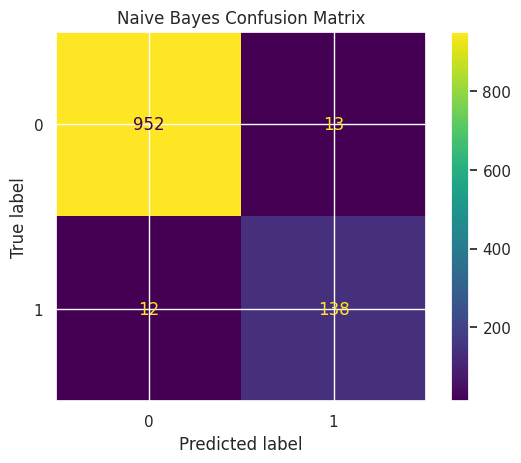

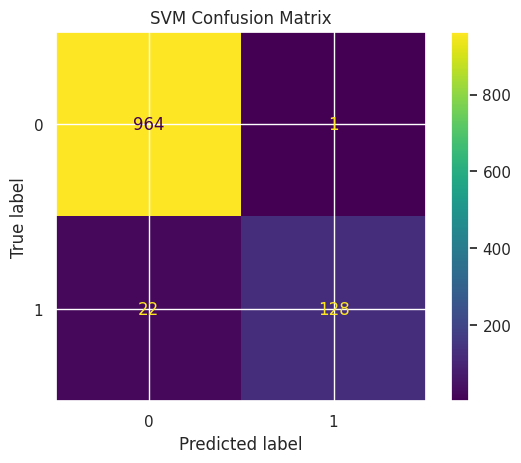

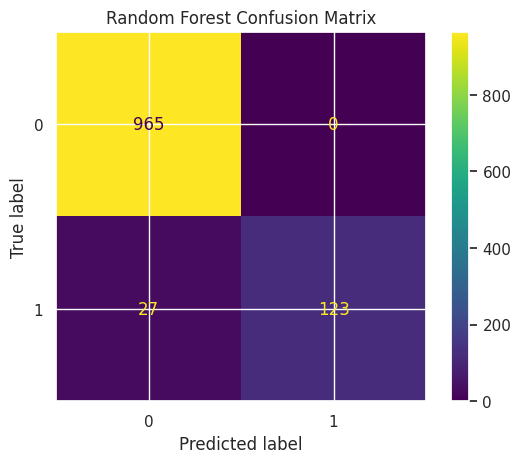

In [ ]:
ConfusionMatrixDisplay.from_estimator(nb_model, X_test, y_test)
plt.title("Naive Bayes Confusion Matrix")
plt.show()

ConfusionMatrixDisplay.from_estimator(svm_model, X_test, y_test)
plt.title("SVM Confusion Matrix")
plt.show()

ConfusionMatrixDisplay.from_estimator(rf_model, X_test, y_test)
plt.title("Random Forest Confusion Matrix")
plt.show()


**Try Stratified K-Fold Cross Validation**

In [ ]:
from sklearn.model_selection import cross_val_score

cv_score = cross_val_score(nb_model, X, y, cv=5, scoring='accuracy')
print("Naive Bayes CV Accuracy:", cv_score.mean())


Naive Bayes CV Accuracy: 0.9759507612047242
